In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [87]:
class GD(object):
    def __init__(self, eta=1.0, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter
    
    def fit(self, X, y, W=None, lost_f='quadratic'):
        #self.w_ = np.zeros(1+X.shape[1])
        if W.all():
            self.w_ = W            
        else:
            self.w_ = np.zeros(1+X.shape[1])
            
        #print(W)
            
        self.cost_ = []
        if lost_f == 'quadratic':
            for i in range(self.n_iter):
                output = self.activation(X)
                error = (output-y)
                self.w_[1:] -= self.eta * np.sum(error * sigmoid_prime(self.net_input(X)) * X, axis=0)
                self.w_[0] -= self.eta * (error * sigmoid_prime(self.net_input(X))).sum()
                cost = (error**2).sum() / 2.0 
                self.cost_.append(cost)
                if (i+1)%50 == 0:
                    print('Epoch {:3d} #######: output={:.2f}, w={:.2f}, b={:.2f}'.format(i+1, output, self.w_[1], self.w_[0]))
        else:
            print('Cost function = cross-entropy')
            for i in range(self.n_iter):
                output = self.activation(X)
                error = (output-y)
                self.w_[1:] -= self.eta * np.sum(error * X, axis=0)
                self.w_[0] -= self.eta * error
                cost = (error**2).sum() / 2.0
                self.cost_.append(cost)
                if (i+1)%50 == 0:
                    print('Epoch {:3d} #######: output={:.2f}, w={:.2f}, b={:.2f}'.format(i+1, output, self.w_[1], self.w_[0]))
        
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, X):
        return 1.0/(1.0+np.exp(-self.net_input(X)))
    
    def predict(self, X):
        """Return class label after unit step"""
        return self.activation(X)

    
#### Miscellaneous functions
def sigmoid(z):
    """The sigmoid function."""
    return 1.0/(1.0+np.exp(-z))

def sigmoid_prime(z):
    """Derivative of the sigmoid function."""
    return sigmoid(z)*(1-sigmoid(z))

Epoch  50 #######: output=0.39, w=-0.38, b=-0.08
Epoch 100 #######: output=0.21, w=-0.81, b=-0.51
Epoch 150 #######: output=0.15, w=-1.01, b=-0.71
Epoch 200 #######: output=0.12, w=-1.13, b=-0.83
Epoch 250 #######: output=0.11, w=-1.21, b=-0.92
Epoch 300 #######: output=0.09, w=-1.28, b=-0.98


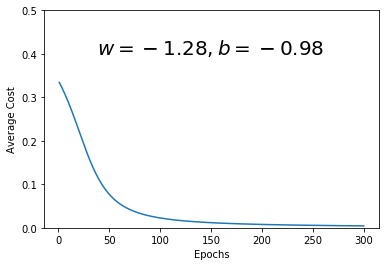

In [83]:
x = np.array([1.0])
y = np.array([0.0])
W = np.array([0.9, 0.6])

gd = GD(n_iter=300, eta=0.15)
gd.fit(x, y, W)

plt.plot(range(1, len(gd.cost_) + 1), gd.cost_, '-')
plt.ylim([0.0, 0.5])
plt.xlabel('Epochs')
plt.ylabel('Average Cost')
plt.text(150, 0.4, r"$w={:.2f}, b={:.2f}$".format(gd.w_[1], gd.w_[0]),
         horizontalalignment='center', fontsize=20)
plt.show()

Epoch  50 #######: output=0.98, w=1.85, b=1.85
Epoch 100 #######: output=0.96, w=1.65, b=1.64
Epoch 150 #######: output=0.93, w=1.32, b=1.32
Epoch 200 #######: output=0.79, w=0.65, b=0.64
Epoch 250 #######: output=0.36, w=-0.29, b=-0.31
Epoch 300 #######: output=0.20, w=-0.68, b=-0.69


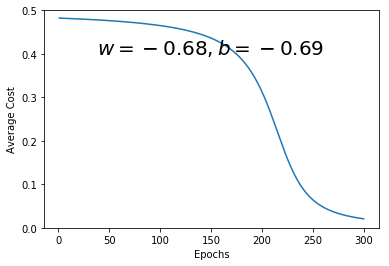

In [82]:
x = np.array([1.0])
y = np.array([0.0])
W = np.array([2.0, 2.0])

gd = GD(n_iter=300, eta=0.15)
gd.fit(x, y, W)

plt.plot(range(1, len(gd.cost_) + 1), gd.cost_, '-')
plt.ylim([0.0, 0.5])
plt.xlabel('Epochs')
plt.ylabel('Average Cost')
plt.text(150, 0.4, r"$w={:.2f}, b={:.2f}$".format(gd.w_[1], gd.w_[0]),
         horizontalalignment='center', fontsize=20)
plt.show()

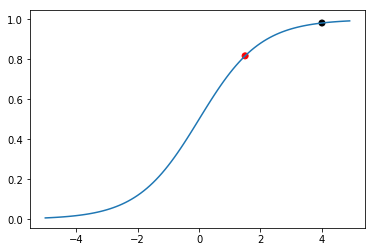

In [46]:
a = np.arange(-5,5,0.1)
b = sigmoid(a)
start1 = sigmoid(1.5)
start2 = sigmoid(4.0)

plt.scatter([1.5, 4.0], [start1, start2], marker='o', c=['r', 'k'])
plt.plot(a, b)
plt.show()

Cost function = cross-entropy
Epoch  50 #######: output=0.42, w=-0.32, b=-0.02
Epoch 100 #######: output=0.22, w=-0.78, b=-0.48
Epoch 150 #######: output=0.14, w=-1.04, b=-0.74
Epoch 200 #######: output=0.10, w=-1.23, b=-0.93
Epoch 250 #######: output=0.08, w=-1.37, b=-1.07
Epoch 300 #######: output=0.07, w=-1.47, b=-1.17


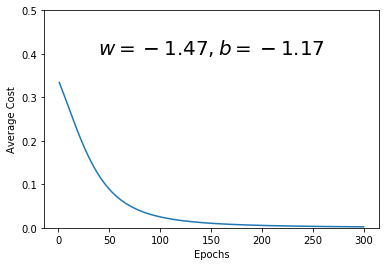

In [94]:
x = np.array([1.0])
y = np.array([0.0])
W = np.array([0.9, 0.6])

gd = GD(n_iter=300, eta= 0.03)
gd.fit(x, y, W, lost_f='cross-entropy')

plt.plot(range(1, len(gd.cost_) + 1), gd.cost_, '-')
plt.ylim([0.0, 0.5])
plt.xlabel('Epochs')
plt.ylabel('Average Cost')
plt.text(150, 0.4, r"$w={:.2f}, b={:.2f}$".format(gd.w_[1], gd.w_[0]),
         horizontalalignment='center', fontsize=20)
plt.show()

Cost function = cross-entropy
Epoch  50 #######: output=0.51, w=-0.01, b=-0.01
Epoch 100 #######: output=0.18, w=-0.76, b=-0.76
Epoch 150 #######: output=0.10, w=-1.10, b=-1.10
Epoch 200 #######: output=0.07, w=-1.30, b=-1.30
Epoch 250 #######: output=0.05, w=-1.45, b=-1.45
Epoch 300 #######: output=0.04, w=-1.57, b=-1.57


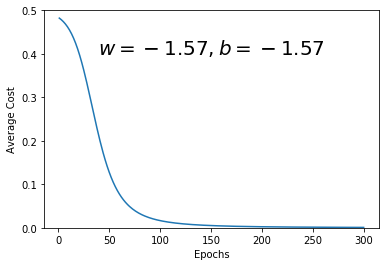

In [100]:
x = np.array([1.0])
y = np.array([0.0])
W = np.array([2.0, 2.0])

gd = GD(n_iter=300, eta= 0.05)
gd.fit(x, y, W, 'cross-entropy')

plt.plot(range(1, len(gd.cost_) + 1), gd.cost_, '-')
plt.ylim([0.0, 0.5])
plt.xlabel('Epochs')
plt.ylabel('Average Cost')
plt.text(150, 0.4, r"$w={:.2f}, b={:.2f}$".format(gd.w_[1], gd.w_[0]),
         horizontalalignment='center', fontsize=20)
plt.show()

In [111]:
def softmax(X):
    exp_x = np.exp(X) 
    sum_expx = np.sum(exp_x, axis=1).reshape(-1, 1)
    output = np.divide(exp_x, sum_expx)
    return output

X = np.array([[2.5, -1, 3.2, 0.5],
              [2.5, -1, 3.2, 2],
              [2.5, -1, 3.2, 5],
              [2.5, -1, 3.2, -2],
              [2.5, -1, 3.2, -5]])

active_X = softmax(X)

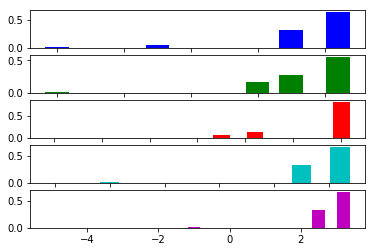

# How to fit an elephant

John von Neumann famously said:

***With four parameters I can fit an elephant, and with five I can make him wiggle his trunk.***

By this he meant that one should not be impressed when a complex model fits a data set well. With enough parameters, you can fit any data set.

It turns out you can literally fit an elephant with four parameters if you allow the parameters to be complex numbers.A paper explaining how to fit an elephant: “Drawing an elephant with four complex parameters” by Jurgen Mayer, Khaled Khairy, and Jonathon Howard,  Am. J. Phys. 78, 648 (2010), DOI:10.1119/1.325401.

This code produced the image by Piotr Zolnierczuk.

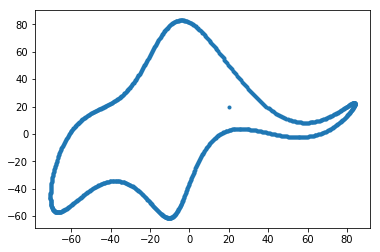

In [123]:
"""
Author: Piotr A. Zolnierczuk (zolnierczukp at ornl dot gov)
 
Based on a paper by:
Drawing an elephant with four complex parameters
Jurgen Mayer, Khaled Khairy, and Jonathon Howard,
Am. J. Phys. 78, 648 (2010), DOI:10.1119/1.3254017
"""
 
# elephant parameters
p1, p2, p3, p4 = (50 - 30j, 18 +  8j, 12 - 10j, -14 - 60j )
p5 = 40 + 20j # eyepiece
 
def fourier(t, C):
    f = np.zeros(t.shape)
    A, B = C.real, C.imag
    for k in range(len(C)):
        f = f + A[k]*np.cos(k*t) + B[k]*np.sin(k*t)
    return f
 
def elephant(t, p1, p2, p3, p4, p5):
    npar = 6
    Cx = np.zeros((npar,), dtype='complex')
    Cy = np.zeros((npar,), dtype='complex')
 
    Cx[1] = p1.real*1j
    Cx[2] = p2.real*1j
    Cx[3] = p3.real
    Cx[5] = p4.real
 
    Cy[1] = p4.imag + p1.imag*1j
    Cy[2] = p2.imag*1j
    Cy[3] = p3.imag*1j
 
    x = np.append(fourier(t,Cx), [-p5.imag])
    y = np.append(fourier(t,Cy), [p5.imag])
 
    return x,y
 
x, y = elephant(np.linspace(0,2*np.pi,1000), p1, p2, p3, p4, p5)
plt.plot(y,-x,'.')
plt.show()